In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import spotipy.client as client

import json
import time

import requests

## Import billboard data

In [11]:
songs_df=pd.read_csv('my_data/songs_billboard.csv')
artists_df=pd.read_csv('my_data/artistes_billboard.csv')
billboard = pd.read_csv('my_data/my_billboard.csv')

## Import spotify features

In [12]:
spotifyFeatures = pd.read_csv("data/features_billboard.csv")

spotifyFeatures=spotifyFeatures[['SongID','spotify_genre','spotify_track_id',
                                 'spotify_track_explicit','spotify_track_duration_ms',
                                'danceability', 'energy', 'loudness', 'speechiness',
                                 'acousticness', 'instrumentalness','valence', 'tempo']]

print(len(spotifyFeatures))

28482


## Change type str to float on features columns

In [13]:
def changeStrFloatToFloat_df(df,column):
    df[column]=df[column].apply(lambda x:str(x))
    df[column]=df[column].apply(lambda x:x.replace(",", "."))
    df[column]=df[column].astype(float)
    
    return df

In [14]:
columns=['danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness','valence', 'tempo']
for col in columns:
    spotifyFeatures=changeStrFloatToFloat_df(spotifyFeatures,col)

## DUPLICATS

In [15]:
print(len(spotifyFeatures))

spotifyFeatures = spotifyFeatures.drop_duplicates() # Presence de 105 duplicats

print(len(spotifyFeatures))

28482
28377


## Merge billboard and spotify data

In [16]:
songs_features_df = pd.merge(songs_df,spotifyFeatures,how='left')

In [17]:
print("len :",len(songs_features_df))
songs_features_df.isnull().sum()

len : 28475


SongID                          0
year                            0
comboWeek                       0
comboInstance                   0
maxPose                         0
top1                            0
top5                            0
top10                           0
spotify_genre                1325
spotify_track_id             4839
spotify_track_explicit       4839
spotify_track_duration_ms    4839
danceability                 4902
energy                       4902
loudness                     4902
speechiness                  4902
acousticness                 4902
instrumentalness             4902
valence                      4902
tempo                        4902
dtype: int64

## Repartion des track ID spotify manquant par année

In [18]:
idMissing = songs_features_df['spotify_track_id'].isnull()
idMissing=idMissing[idMissing == True].index

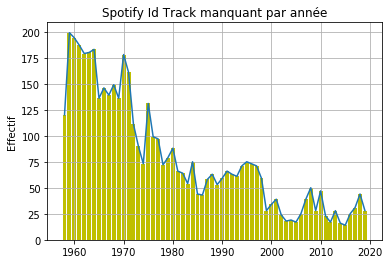

In [19]:
xx=songs_features_df.loc[idMissing]

xx=xx['year'].value_counts().sort_index()

plt.plot(xx.index,xx.values)
plt.bar(xx.index,xx.values,color='y')
plt.grid()
plt.title('Spotify Id Track manquant par année')
plt.ylabel('Effectif')
plt.show()

### RECAP DATAFRAME

In [21]:
songs_features_df.tail()

,SongID,year,comboWeek,comboInstance,maxPose,top1,top5,top10,spotify_genre,spotify_track_id,spotify_track_explicit,spotify_track_duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
28470,What'd You Come Here For?Trina & Tamara,1999,12,1,56,0,0,0,"['deep pop r&b', 'hip pop', 'miami hip hop', '...",1Mg13VMaQj4fhPtQT41vUZ,False,246000.0,0.817,0.625,-3.643,0.0719,0.0508,0.001230,0.759,102.907
28471,What's A Guy Gotta DoJoe Nichols,2005,15,2,64,0,0,0,"['arkansas country', 'contemporary country', '...",3AiNYdRmhXcv7KCFHZOddA,False,141946.0,0.637,0.963,-3.808,0.0770,0.6620,0.000031,0.920,170.224
28472,What's A Matter Baby (Is It Hurting You)Timi Yuro,1962,11,1,12,0,0,0,"['adult standards', 'brill building pop']",5w0dh39SYz1ei2tCs7X7Fo,False,165560.0,0.685,0.760,-9.354,0.0430,0.4300,0.000000,0.895,113.569
28473,Everybody Dies In Their NightmaresXXXTENTACION,2018,7,2,42,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28474,Into The Great Wide OpenTom Petty And The Hear...,1991,5,1,92,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3 songID du spotify features df etait different du billboard df

    '1-2-3Gloria Estefan & Miami Sound Machine'
    'Vanilla ÓlayJackie DeShannon'
    'Mercy4.0'
    
### 98 songID ne sont pas dans spotify features df

    ...
    Don't You KnowDella Reese
    88
    Do Re Miblackbear
    89
    Don't You Love Me49-ers
    90
    ...

## PETIT RECAP

## Analyse GENRE feature

    Il y a trop de genre spotify (+ de 1000). 
    Donc on va les supprimer de nos données. 
    Et utiliser les genres de musimap (35 env) pour comparer ces genres a nos clusters .